In [1]:
data <- read.table('4.txt', header = FALSE)

Сделаем все то же самое, что в предыдущей задаче.

In [2]:
n <- 400
q <- 100

In [3]:
train_data = data[1:n, 1:ncol(data)]
test_data = data[(n + 1):(n + q), 1:ncol(data)]

In [4]:
library('bestglm')
for (ic in c("AIC", "BIC", "BICg", "BICq", "LOOCV", "CV")) {
    print(bestglm(train_data, IC=ic))
}

Loading required package: leaps


AIC
BICq equivalent for q in (0.0240181605005558, 0.90305048728108)
Best Model:
             Estimate Std. Error   t value      Pr(>|t|)
(Intercept) -2.618613 1.33832271 -1.956638  5.109244e-02
V2           6.249926 0.07000186 89.282285 1.926502e-264
V4          -1.763628 0.33405375 -5.279472  2.140555e-07
V5           1.737883 0.47314165  3.673072  2.725753e-04
BIC
BICq equivalent for q in (0.0240181605005558, 0.90305048728108)
Best Model:
             Estimate Std. Error   t value      Pr(>|t|)
(Intercept) -2.618613 1.33832271 -1.956638  5.109244e-02
V2           6.249926 0.07000186 89.282285 1.926502e-264
V4          -1.763628 0.33405375 -5.279472  2.140555e-07
V5           1.737883 0.47314165  3.673072  2.725753e-04
BICg(g = 1)
BICq equivalent for q in (0.0240181605005558, 0.90305048728108)
Best Model:
             Estimate Std. Error   t value      Pr(>|t|)
(Intercept) -2.618613 1.33832271 -1.956638  5.109244e-02
V2           6.249926 0.07000186 89.282285 1.926502e-264
V4         

Получили всего один вариант модели. С признаками V2 V4 V5

In [5]:
XX = t(data.matrix(train_data[1:n,c(2, 4, 5)])) %*% data.matrix(train_data[1:n,c(2, 4, 5)])
lambdas = eigen(XX)$values
print(max(lambdas) / min(lambdas))

[1] 185.7651


Можно считать, что мультиколлинеарности нет.

In [6]:
model <- lm(formula = V6 ~ V2 + V4 + V5, data = train_data)

In [7]:
predictions <- predict(model, test_data)

In [8]:
mean((test_data['V6'] - predictions) ^ 2)

[1] 0.1722734

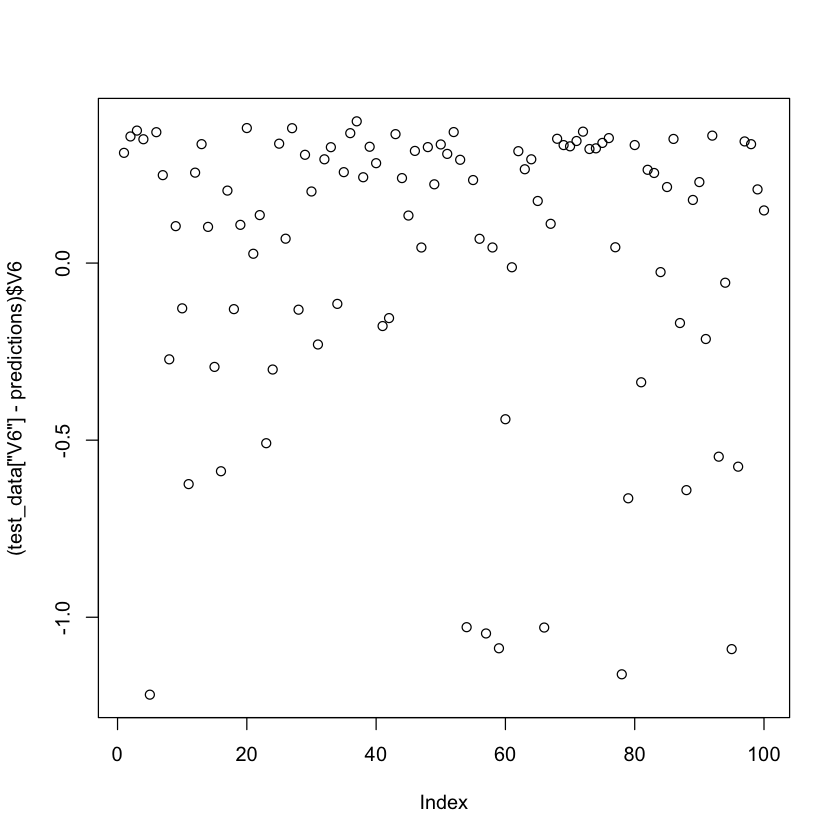

In [9]:
plot((test_data['V6'] - predictions)$V6)

Интресно, что остатки распределены не нормально. Это не хорошо, но результат по MSE получился не плохой